In [22]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from sklearn import preprocessing,svm,datasets,neighbors

In [2]:
# importing the dataset
df = pd.read_csv('Downloads/heart.csv')
print(df)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2     

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [4]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

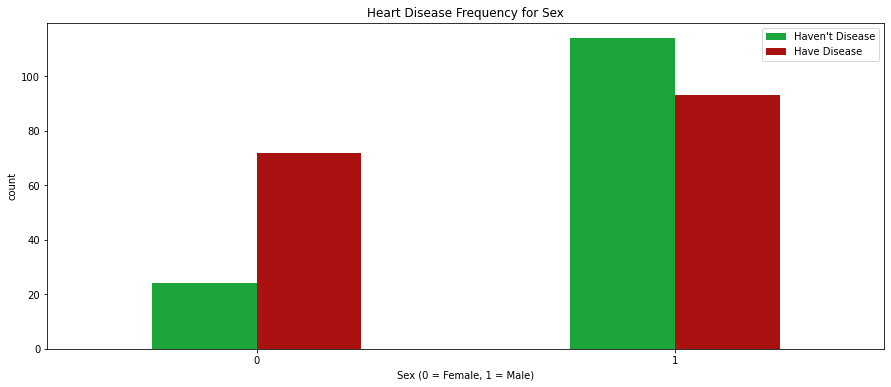

In [5]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('count')
plt.show()

In [6]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

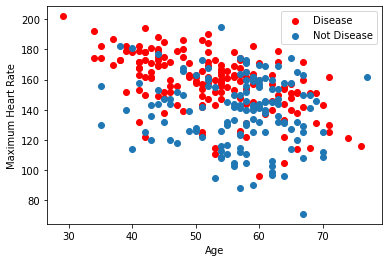

In [7]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

In [8]:
# extracting the x and y from the dataset
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
print(x)
print(y)

[[63.  1.  3. ...  0.  0.  1.]
 [37.  1.  2. ...  0.  0.  2.]
 [41.  0.  1. ...  2.  0.  2.]
 ...
 [68.  1.  0. ...  1.  2.  3.]
 [57.  1.  0. ...  1.  1.  3.]
 [57.  0.  1. ...  1.  1.  2.]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]


In [9]:
# feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
print(x)

[[ 0.9521966   0.68100522  1.97312292 ... -2.27457861 -0.71442887
  -2.14887271]
 [-1.91531289  0.68100522  1.00257707 ... -2.27457861 -0.71442887
  -0.51292188]
 [-1.47415758 -1.46841752  0.03203122 ...  0.97635214 -0.71442887
  -0.51292188]
 ...
 [ 1.50364073  0.68100522 -0.93851463 ... -0.64911323  1.24459328
   1.12302895]
 [ 0.29046364  0.68100522 -0.93851463 ... -0.64911323  0.26508221
   1.12302895]
 [ 0.29046364 -1.46841752  0.03203122 ... -0.64911323  0.26508221
  -0.51292188]]


In [10]:
# splitting x and y into training and test data
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size = 0.2,random_state = 0)
print(x_te)

[[ 1.72421839  0.68100522 -0.93851463  0.76395577 -1.39653716 -0.41763453
   0.89896224 -1.07781984  1.43548113  1.34614673 -2.27457861 -0.71442887
   1.12302895]
 [ 1.06248543  0.68100522  1.97312292  2.19177836 -0.3722866  -0.41763453
  -1.00583187  0.23409531 -0.69663055 -0.37924438 -0.64911323 -0.71442887
   1.12302895]
 [ 0.5110413   0.68100522  1.97312292  2.19177836  0.80656782 -0.41763453
  -1.00583187  0.40901733 -0.69663055 -0.7243226  -0.64911323 -0.71442887
   1.12302895]
 [ 0.62133012  0.68100522 -0.93851463 -0.3783023   0.22680335 -0.41763453
  -1.00583187 -0.37813176  1.43548113  1.51868584 -0.64911323  0.26508221
   1.12302895]
 [ 0.84190778  0.68100522  1.00257707 -0.09273778 -0.29498467 -0.41763453
   0.89896224 -0.15947923 -0.69663055  0.65599028 -0.64911323  2.22410436
   1.12302895]
 [-0.7021358   0.68100522 -0.93851463 -0.43541521  0.53601107 -0.41763453
  -1.00583187  0.71513086 -0.69663055 -0.46551394 -0.64911323 -0.71442887
   1.12302895]
 [-1.58444641  0.68100

# KNN Algorithm

In [11]:
# creating and training the KNN algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(x_tr,y_tr)

KNeighborsClassifier()

In [12]:
# predciting the output and printing
y_pred = classifier.predict(x_te)
z = np.append(arr=y_pred.reshape(61,1),values=y_te.reshape(61,1),axis=1)
print(z)

[[0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]]


In [13]:
# printing the accuracy score and the confusion matrix
from sklearn.metrics import accuracy_score,confusion_matrix
acc = accuracy_score(y_te,y_pred)
cm = confusion_matrix(y_te,y_pred)
print(acc)
print(cm)

0.819672131147541
[[21  6]
 [ 5 29]]


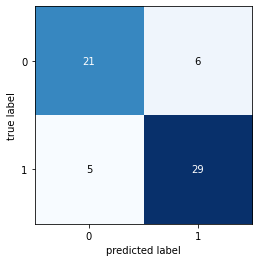

In [14]:
# plotting the confusion matrix and the decision regions
from mlxtend.plotting import plot_confusion_matrix,plot_decision_regions
plot_confusion_matrix(cm,cmap = 'Blues')
plt.show()

ValueError: Filler values must be provided when X has more than 2 training features.

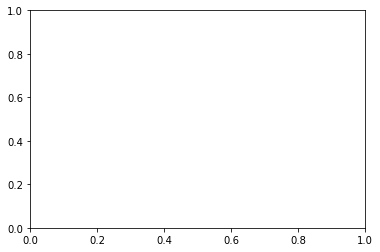

In [23]:
clf = neighbors.KNeighborsClassifier(n_neighbors=5)
clf.fit(x, y)
# Plotting decision region
plot_decision_regions(x, y, clf=clf, legend=2)
# Adding axes annotations
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# SVM

In [20]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear',random_state=0)
classifier.fit(x_tr,y_tr)

SVC(kernel='linear', random_state=0)

In [21]:
y_pred = classifier.predict(x_te)
print(y_pred)

[0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 1 0
 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1]


In [22]:
z = np.append(arr=y_pred.reshape(61,1),values=y_te.reshape(61,1),axis=1)
print(z)

[[0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]]


In [23]:
from sklearn.metrics import accuracy_score,confusion_matrix
acc= accuracy_score(y_te,y_pred)
cm = confusion_matrix(y_te,y_pred)
print(acc)
print(cm)

0.819672131147541
[[20  7]
 [ 4 30]]


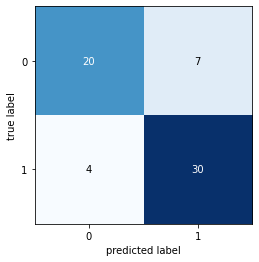

In [24]:
from mlxtend.plotting import plot_confusion_matrix,plot_decision_regions
plot_confusion_matrix(cm)
plt.show()

Text(0.5, 1.0, 'SVM Decision Region Boundary')

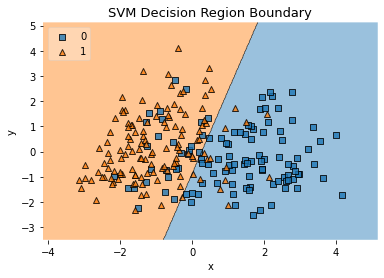

In [34]:
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

clf = SVC(C=100,gamma=0.0001)
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(x_tr)
clf.fit(X_train2, y_tr)
plot_decision_regions(X_train2, y_tr, clf=clf, legend=2)

plt.xlabel('x')
plt.ylabel('y')
plt.title('SVM Decision Region Boundary', size=13)

# SVM With PCA

In [16]:
from sklearn.decomposition import PCA
# the PCA class take n_components as the input values, since in the starting
# we do not have any information about the eigen values or the explained variance
# we do not use the n_components parameter
pca = PCA(n_components=2)
x = pca.fit_transform(x)
# to know the explained variance we have explained_variance_ration function
# of the PCA class
PVE = pca.explained_variance_ratio_
print(PVE)
# now as we know the explained valriance aof all the features we can select any
# number of features we want. for this dataset i am choosing first 2 components
print(x)

[0.21254053 0.11820708]
[[ 6.24110729e-01  2.32127028e+00]
 [-4.55987975e-01 -9.57350982e-01]
 [-1.82880491e+00  4.28847737e-02]
 [-1.71600605e+00 -4.95337323e-01]
 [-3.71356421e-01  3.01156175e-01]
 [-6.48867460e-01 -3.82882350e-01]
 [-7.26534041e-02  1.46021954e+00]
 [-1.90592574e+00 -1.15199470e+00]
 [-9.05732769e-01  1.17802505e+00]
 [-1.42452084e+00  6.00440468e-02]
 [-8.29249247e-01 -4.31111662e-01]
 [-1.76837052e+00  6.66082010e-01]
 [-1.73039364e+00 -3.62122452e-01]
 [ 4.78579542e-01 -3.66100880e-01]
 [-1.13904999e+00  3.31505033e+00]
 [-1.15305728e+00  3.38842792e-02]
 [-2.05289635e+00  1.44304375e+00]
 [ 1.24660567e+00  1.56563220e+00]
 [-1.17898795e+00 -5.93288357e-01]
 [-3.87798996e-01  2.04509682e+00]
 [-1.09484581e-02 -7.39533549e-01]
 [-1.69288377e+00 -1.05478211e+00]
 [-2.03684479e+00 -9.44816640e-01]
 [ 9.35559575e-01  9.21609753e-01]
 [-1.32664177e+00 -1.31154957e+00]
 [-1.39644919e-01  2.60255695e+00]
 [-7.38694870e-01  1.29433620e+00]
 [-1.46985273e+00 -1.28905546e+

In [17]:
# splitting the dataset into training and test set for the svm algorithm
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size= 0.2,random_state=0)

In [18]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear',random_state=0)
classifier.fit(x_tr,y_tr)

SVC(kernel='linear', random_state=0)

In [19]:
y_pred = classifier.predict(x_te)
from sklearn.metrics import accuracy_score,confusion_matrix
acc = accuracy_score(y_te,y_pred)
cm = confusion_matrix(y_te,y_pred)
print(acc)
print(cm)

0.819672131147541
[[21  6]
 [ 5 29]]


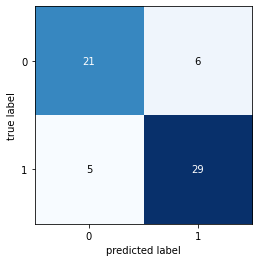

In [20]:
from mlxtend.plotting import plot_confusion_matrix,plot_decision_regions
plot_confusion_matrix(cm)
plt.show()

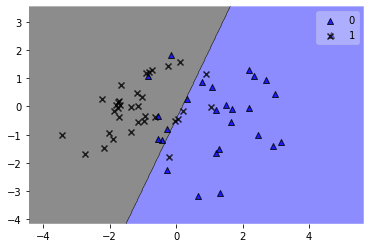

In [23]:
plot_decision_regions(X=x_te,y=y_te,clf=classifier,colors='blue,black',markers='^x')
plt.show()

# KNN With PCA

In [27]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(x_tr,y_tr)

KNeighborsClassifier()

In [29]:
# predciting the output and printing
y_pred = classifier.predict(x_te)
z = np.append(arr=y_pred.reshape(61,1),values=y_te.reshape(61,1),axis=1)
print(z)

[[0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]]


In [30]:
# printing the accuracy score and the confusion matrix
from sklearn.metrics import accuracy_score,confusion_matrix
acc = accuracy_score(y_te,y_pred)
cm = confusion_matrix(y_te,y_pred)
print(acc)
print(cm)

0.8688524590163934
[[21  6]
 [ 2 32]]


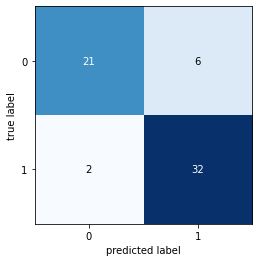

In [31]:
# plotting the confusion matrix and the decision regions
from mlxtend.plotting import plot_confusion_matrix,plot_decision_regions
plot_confusion_matrix(cm,cmap = 'Blues')
plt.show()

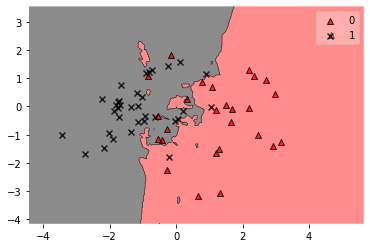

In [33]:
plot_decision_regions(X=x_te,y=y_te,clf=classifier,colors='red,black',markers='^x')
plt.show()

In [ ]:
!pip3 install torch torchvision torchaudio
!pip install easyocr

  Using cached torch-0.1.2.post2.tar.gz (128 kB)
  Using cached torchvision-0.2.2.post3-py2.py3-none-any.whl (64 kB)


ERROR: Could not find a version that satisfies the requirement torchaudio (from versions: none)
ERROR: No matching distribution found for torchaudio
